In [19]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

#seaborn theme
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('http://bit.ly/QuantileHealthDataset')
df

,dupersid,totexp,ltotexp,suppins,totchr,age,female,white
0,93193020,3,1.098612,1,0,69,0,1
1,72072017,6,1.791759,1,0,65,1,1
2,25296013,9,2.197225,0,0,85,1,1
3,23628011,14,2.639057,0,0,76,1,1
4,95041014,18,2.890372,0,1,71,1,1
...,...,...,...,...,...,...,...,...
2950,26147015,102303,11.535690,1,4,80,1,1
2951,21857010,104823,11.560030,0,2,69,1,1
2952,93171014,108256,11.592250,1,1,65,0,1
2953,90613022,123611,11.724890,1,3,66,1,1


In [3]:
# Dependent variable  - > total expenditure

# Independent variable(s)  - > age, female, white

df.dtypes

dupersid      int64
totexp        int64
ltotexp     float64
suppins       int64
totchr        int64
age           int64
female        int64
white         int64
dtype: object

<AxesSubplot:xlabel='female', ylabel='totexp'>

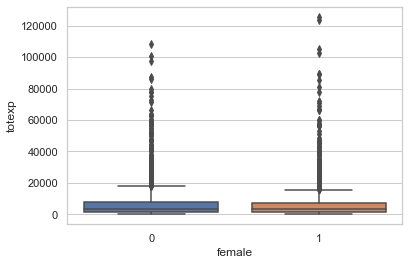

In [20]:
sns.boxplot(data = df, x='female', y='totexp')

<AxesSubplot:xlabel='white', ylabel='totexp'>

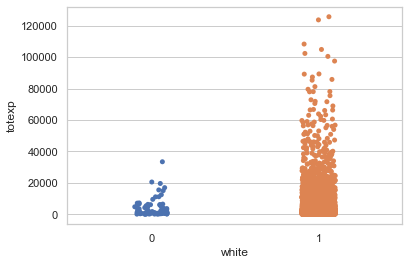

In [21]:
sns.stripplot(data = df, x='white', y='totexp')

<AxesSubplot:xlabel='age', ylabel='totexp'>

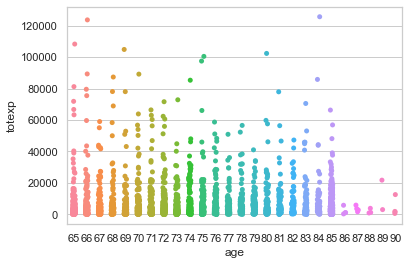

In [22]:
sns.stripplot(data = df, x='age', y='totexp')

In [15]:
# Due to precense of alot of outliers in the dependent variable, quantiles will be used
X = df[['age', 'female', 'white']].values
y = df['totexp'].values

In [23]:
# Quantile Regression

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
mod = smf.quantreg('y ~ X', df)
res = mod.fit(q=.5)

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.004231
Model:                       QuantReg   Bandwidth:                       1545.
Method:                 Least Squares   Sparsity:                        9301.
Date:                Tue, 12 Oct 2021   No. Observations:                 2955
Time:                        12:26:43   Df Residuals:                     2951
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3023.9613   1102.146     -2.744      0.006   -5185.014    -862.909
X[0]          69.1364     13.480      5.129      0.000      42.704      95.568
X[1]        -176.9024    174.139     -1.016      0.310    -518.349     164.544
X[2]        1303.3703    534.671      2.438      0.0